In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
###READ CSV INTO PD DATAFRAME
zebra = pd.read_csv('Resources/collecting_zebra.csv')
zebra

,Date,Year,Temp,ToBottom,ToBottomNum,TowLength,VolConc,VolSubSample,TotalCount,Diameter,Density
0,6/2/94,1994,15.6,False,0,6.0,50.0,50.0,1,13,13
1,6/2/94,1994,18.0,False,0,6.0,50.0,50.0,3,13,38
2,6/7/94,1994,16.8,False,0,9.0,50.0,50.0,3,13,25
3,6/7/94,1994,19.1,False,0,13.0,50.0,50.0,3,13,17
4,6/15/94,1994,24.2,False,0,5.0,50.0,50.0,12,13,181
...,...,...,...,...,...,...,...,...,...,...,...
1941,9/14/12,2012,19.0,False,0,2.0,98.0,3.0,3,13,738
1942,9/22/12,2012,19.9,False,0,10.0,49.0,3.0,8,13,197
1943,6/21/13,2013,16.6,False,0,10.0,46.0,3.0,14,13,323
1944,6/21/13,2013,16.4,False,0,10.0,47.0,3.0,71,13,1676


In [3]:
###ASSIGN DATA TO THE VARIABLES
X = zebra["Temp"].values.reshape(-1, 1)
y = zebra["TotalCount"].values.reshape(-1, 1)
print(X.shape, y.shape)

(1946, 1) (1946, 1)


Text(0, 0.5, 'Total Larvae Count')

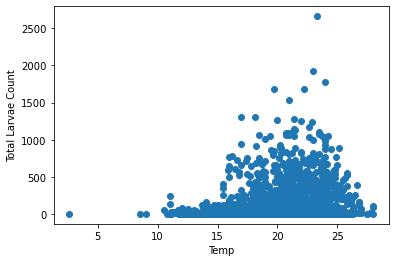

In [4]:
plt.scatter(X, y)
plt.xlabel("Temp")
plt.ylabel("Total Larvae Count")

In [5]:
###SPLIT DATA INTO TRAINING AND TESTING
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)


In [6]:
###CREATE MODEL TO FIT TO TRAINING DATA
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [7]:
###TRANSFORM BOTH TRAINING AND TESTING
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [8]:
###CREATE MODEL AND FIT IT TO THE TRAINING DATA
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [9]:
###MAKE PREDICTIONS USED TO SCALE TEST DATA
predictions = model.predict(X_test_scaled)

In [10]:
###CALCULATE MSE and R^2 
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.7297496249313621, R2: 0.038523953219532614


In [11]:
###USE RIDGE MODEL FOR REGULARIZATION
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.7297496633875248, R2: 0.03852390255190907


In [12]:
model.coef_

array([[0.16781594]])

In [13]:
len(X_test)

487

Text(0.5, 0, 'Predictive Count')

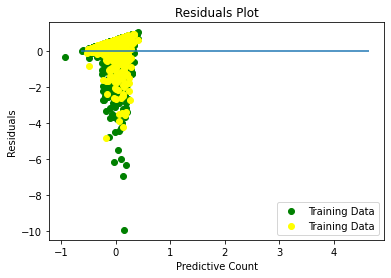

In [20]:
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="green", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="yellow", label="Training Data")
plt.legend(loc = "lower right")
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residuals Plot")
plt.ylabel("Residuals")
plt.xlabel("Predictive Count")

In [17]:
plt.savefig('ResidualsPlot.png')

<Figure size 432x288 with 0 Axes>